In [139]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy import stats


In [140]:
#locating the dataset
pd.set_option('display.max_columns', None)

df_trustpilot = pd.read_csv('data/data_trustpilot.csv', engine='python')

df_trustpilot.head()


,username,number_reviews,location,rating,text,date_of_experience,date_posted,verification,subject,hour_posted,day_of_week_posted,days_between_experience_and_post
0,Pat Anderson,1,US,5,I highly recommend using Flashbay. Immediately...,2024-10-16,2024-10-16,Verified,I highly recommend using Flashbay,19:34:05,Wednesday,0
1,Margarita Orlova,1,CZ,5,I had the pleasure of working with Shelby Gibs...,2024-10-10,2024-10-17,Verified,Great customer service,10:27:44,Thursday,7
2,Oran Whittington,1,US,5,The company rep I was working with made everyt...,2024-10-14,2024-10-15,Verified,Certified Crane and Rigging Services. The comp...,16:54:36,Tuesday,1
3,Cristen Gros,1,US,5,Ellie was GREAT! Super helpful with the design...,2024-10-15,2024-10-15,Verified,Ellie was GREAT!!,17:01:29,Tuesday,0
4,Mechelle Fields,1,US,5,My team member “Ellie’s’ worked with me throu...,2024-10-11,2024-10-12,Verified,Beautiful Red Coasters,03:50:51,Saturday,1


In [141]:
#convert date_posted and date_of_experience to datetime

df_trustpilot['date_posted'] = pd.to_datetime(df_trustpilot['date_posted'])
df_trustpilot['date_of_experience'] = pd.to_datetime(df_trustpilot['date_of_experience'])

df_trustpilot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33276 entries, 0 to 33275
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   username                          33276 non-null  object        
 1   number_reviews                    33276 non-null  int64         
 2   location                          33276 non-null  object        
 3   rating                            33276 non-null  int64         
 4   text                              33276 non-null  object        
 5   date_of_experience                33276 non-null  datetime64[ns]
 6   date_posted                       33276 non-null  datetime64[ns]
 7   verification                      33276 non-null  object        
 8   subject                           33276 non-null  object        
 9   hour_posted                       33276 non-null  object        
 10  day_of_week_posted                33276 non-nu

In [142]:
#split set into numeric, categorical and datetime variables
#Provide statistical metrics for numeric variables

numeric_variables = df_trustpilot.select_dtypes(include = ['int', 'float'])
categorical_variables = df_trustpilot.select_dtypes(include=['object']) 
datetime_variables = df_trustpilot.select_dtypes(include=['datetime64'])

print("Numeric variables are: ", numeric_variables.columns)
print("Categorical variables are: ", categorical_variables.columns)
print("Datetime variables are: ", datetime_variables.columns)

print(numeric_variables.describe())


Numeric variables are:  Index(['number_reviews', 'rating', 'days_between_experience_and_post'], dtype='object')
Categorical variables are:  Index(['username', 'location', 'text', 'verification', 'subject',
       'hour_posted', 'day_of_week_posted'],
      dtype='object')
Datetime variables are:  Index(['date_of_experience', 'date_posted'], dtype='object')
       number_reviews        rating  days_between_experience_and_post
count    33276.000000  33276.000000                      33276.000000
mean         1.693292      4.447890                          0.775213
std          3.371778      1.244174                         28.521345
min          1.000000      1.000000                         -1.000000
25%          1.000000      5.000000                          0.000000
50%          1.000000      5.000000                          0.000000
75%          1.000000      5.000000                          0.000000
max        280.000000      5.000000                       3842.000000


In [143]:
#Upon review, it appears that the number_reviews and rating column are fine and do not include faulty data. However, the minimum value for the days_between_experience_and_post column is -1, which should not appear.
#We will further review days_between_experience_and_post.

negative_days = df_trustpilot[df_trustpilot['days_between_experience_and_post'] < 0]

print(negative_days)
print(len(negative_days))

#There is only one entry with negative days, which will be deleted

df_trustpilot = df_trustpilot[df_trustpilot['days_between_experience_and_post'] >= 0]

negative_days_after = df_trustpilot[df_trustpilot['days_between_experience_and_post'] < 0]
print(len(negative_days_after))

#Check outcome
numeric_variables = df_trustpilot.select_dtypes(include = ['int', 'float'])
print("Summary statistics for numeric variables in the dataset:")
print(numeric_variables.describe())

            username  number_reviews location  rating  \
17835  Ben Lancaster               3       AU       1   

                                                    text date_of_experience  \
17835  BE WARNED - stay far away from SteelSeries pro...         2024-07-04   

      date_posted  verification  \
17835  2024-07-03  Not Verified   

                                                 subject hour_posted  \
17835  Cheap Products Designed To Break Outside Warranty    23:43:30   

      day_of_week_posted  days_between_experience_and_post  
17835          Wednesday                                -1  
1
0
Summary statistics for numeric variables in the dataset:
       number_reviews        rating  days_between_experience_and_post
count    33275.000000  33275.000000                      33275.000000
mean         1.693253      4.447994                          0.775267
std          3.371821      1.244049                         28.521772
min          1.000000      1.000000            

In [144]:
#Calculate mode and mean for numeric variables

mode_value = df_trustpilot['number_reviews'].mode()[0]
mode_count = df_trustpilot['number_reviews'].value_counts().iloc[0]
print(f"The most common number of reviews is {mode_value}, appearing {mode_count} times")

mode_value = df_trustpilot['rating'].mode()[0]
mode_count = df_trustpilot['rating'].value_counts().iloc[0]
print(f"The most common rating is {mode_value}, appearing {mode_count} times")

mode_value = df_trustpilot['days_between_experience_and_post'].mode()[0]
mode_count = df_trustpilot['days_between_experience_and_post'].value_counts().iloc[0]
print(f"The most common number of days between the experience and the post is {mode_value}, appearing {mode_count} times")

print("The mean of number of ratings is: ", df_trustpilot['number_reviews'].mean())
print("The mean of ratings is: ", df_trustpilot['rating'].mean())
print("The mean of number of days between the experience and the post is: ", df_trustpilot['days_between_experience_and_post'].mean())


The most common number of reviews is 1, appearing 25568 times
The most common rating is 5, appearing 26551 times
The most common number of days between the experience and the post is 0, appearing 32340 times
The mean of number of ratings is:  1.6932531930879038
The mean of ratings is:  4.447993989481593
The mean of number of days between the experience and the post is:  0.77526671675432


In [145]:
#Calculate distribution of categorical variables

print("Categorical Variables Distribution:")
for col in categorical_variables.columns:
    if col not in ['text', 'subject']:  
        print(f"\n{col} distribution:")
        print(df_trustpilot[col].value_counts(normalize=True).head())

print("Day of Week Distribution:")
print(df_trustpilot['day_of_week_posted'].value_counts(normalize=True))


Categorical Variables Distribution:

username distribution:
username
Customer     0.004718
Anonymous    0.002134
Chris        0.002014
David        0.001863
Alex         0.001803
Name: proportion, dtype: float64

location distribution:
location
US    0.718618
GB    0.055718
CA    0.044778
DE    0.025154
FR    0.013494
Name: proportion, dtype: float64

verification distribution:
verification
Verified        0.85133
Invited         0.11414
Not Verified    0.03438
Redirected      0.00015
Name: proportion, dtype: float64

hour_posted distribution:
hour_posted
19:36:09    0.00018
22:11:21    0.00018
18:10:18    0.00018
17:44:17    0.00015
18:21:57    0.00015
Name: proportion, dtype: float64

day_of_week_posted distribution:
day_of_week_posted
Tuesday      0.197716
Wednesday    0.186987
Thursday     0.179684
Monday       0.159669
Friday       0.157415
Name: proportion, dtype: float64
Day of Week Distribution:
day_of_week_posted
Tuesday      0.197716
Wednesday    0.186987
Thursday     0.17968

In [146]:
#Calculate earliest and latest dates in dataset

print("Temporal variables distribution:")
for col in datetime_variables.columns:
    print(f"\n{col} range:")
    print(f"Earliest: {df_trustpilot[col].min()}")
    print(f"Latest: {df_trustpilot[col].max()}")

Temporal variables distribution:

date_of_experience range:
Earliest: 2012-03-22 00:00:00
Latest: 2024-10-21 00:00:00

date_posted range:
Earliest: 2012-03-22 00:00:00
Latest: 2024-10-21 00:00:00


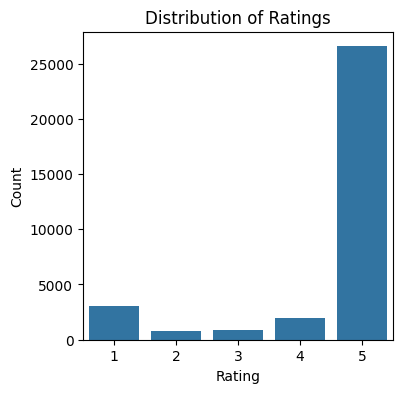

In [147]:
#Shows the distribution of rating
plt.figure(figsize=(4, 4))
sns.countplot(data=df_trustpilot, x='rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

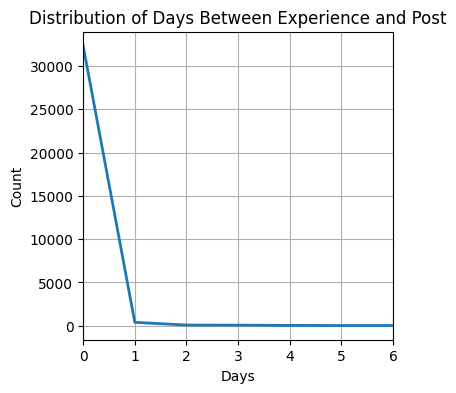

<Figure size 400x400 with 0 Axes>

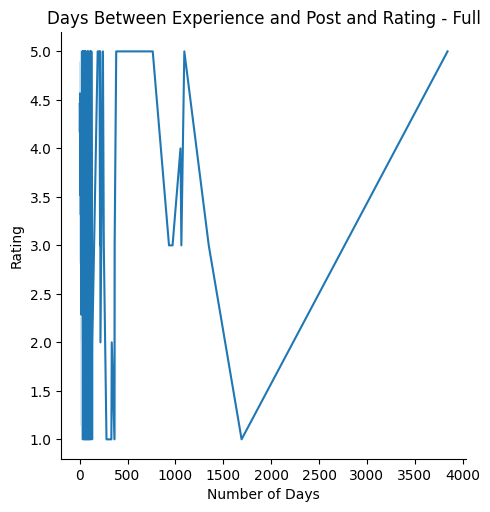

<Figure size 400x400 with 0 Axes>

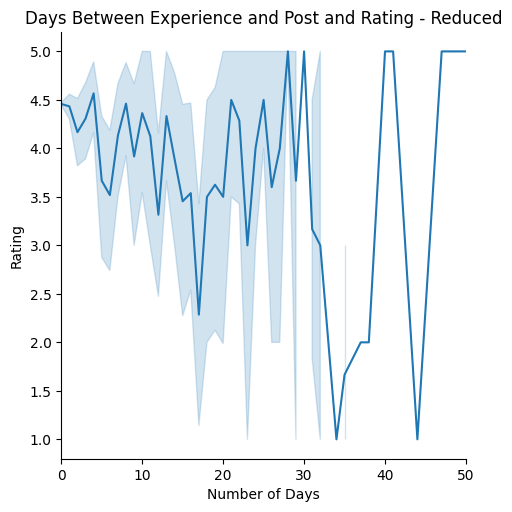

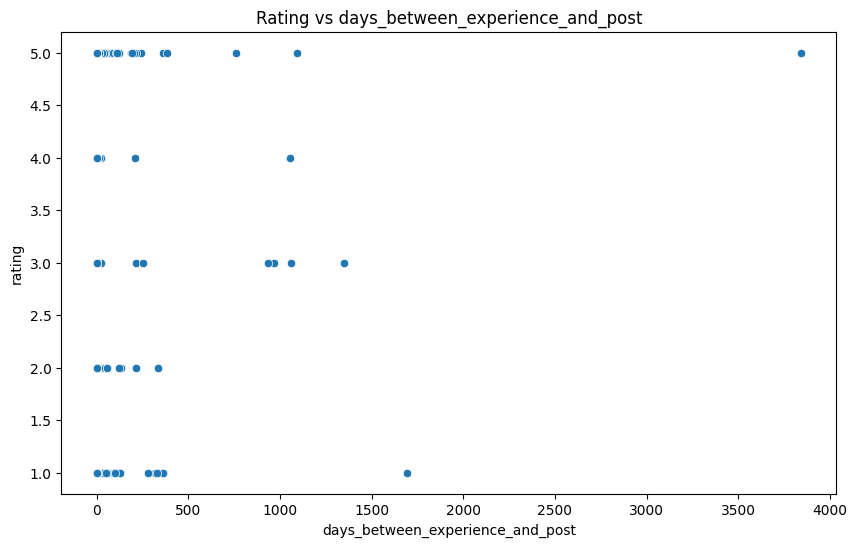

Correlation between rating and days_between_experience_and_post:
                                    rating  days_between_experience_and_post
rating                            1.000000                         -0.021763
days_between_experience_and_post -0.021763                          1.000000


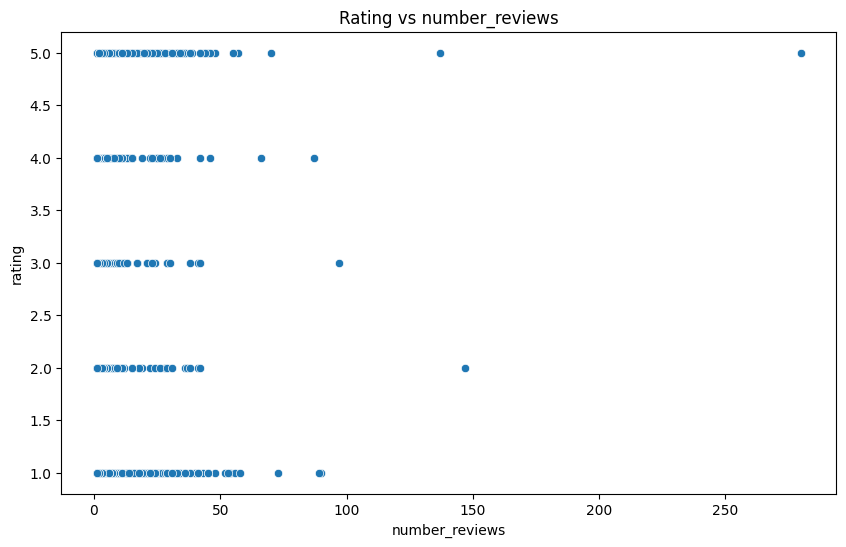

Correlation between rating and number_reviews:
                  rating  number_reviews
rating          1.000000       -0.089761
number_reviews -0.089761        1.000000
The Pearson coefficient for the relationship between rating and days_between_experience_and_post is:  -0.021762616534776517
The Pearson p_value for the relationship between rating and days_between_experience_and_post is:  7.183196435103383e-05
The Spearman coefficient for the relationship between rating and days_between_experience_and_post is:  -0.03156570630983347
The Spearman p_value for the relationship between rating and days_between_experience_and_post is:  8.448500859927452e-09


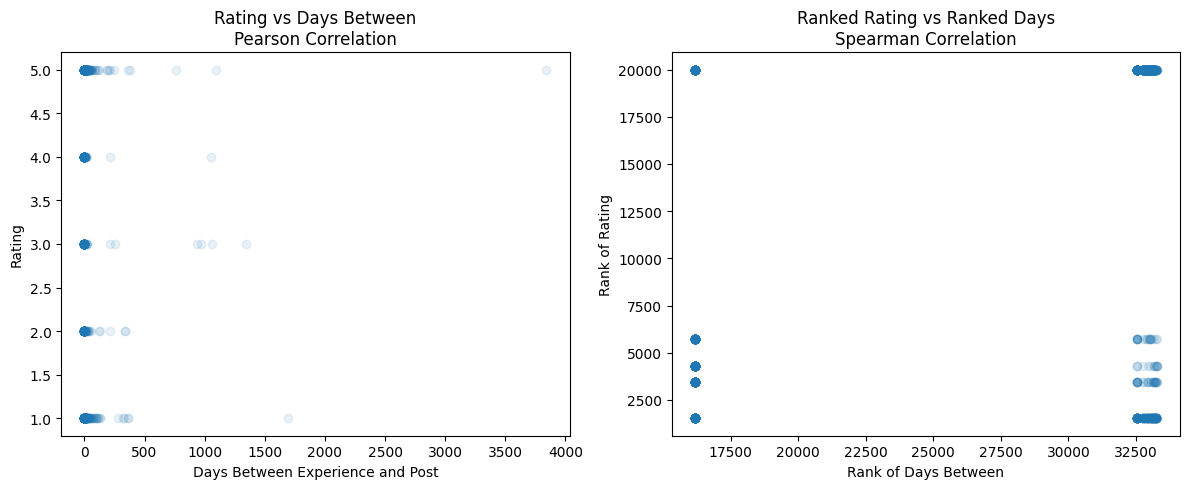

In [148]:
#Next we examine the relationship between the target variable (rating) and the first numeric variable(days_between_experience_and_post)

# Distribution of days_between_experience_and_post
plt.figure(figsize=(4,4))
days_counts = df_trustpilot['days_between_experience_and_post'].value_counts().sort_index()
plt.plot(days_counts.index, days_counts.values, linewidth=2)
plt.title('Distribution of Days Between Experience and Post')
plt.xlabel('Days')
plt.ylabel('Count')
plt.xlim(0, 6)
plt.grid(True)
plt.show()

#Relationship between rating and days_between_experience_and_post
#Full Graph
plt.figure(figsize=(4,4))
sns.relplot(x='days_between_experience_and_post', y='rating', data=df_trustpilot, kind='line')
plt.title('Days Between Experience and Post and Rating - Full')
plt.xlabel('Number of Days')
plt.ylabel('Rating')
plt.show()

#Reduced size
plt.figure(figsize=(4,4))
sns.relplot(x='days_between_experience_and_post', y='rating', data=df_trustpilot, kind='line')
plt.title('Days Between Experience and Post and Rating - Reduced')
plt.xlabel('Number of Days')
plt.ylabel('Rating')
plt.xlim(0, 50)
plt.show()

numeric_vars = ['days_between_experience_and_post', 'number_reviews']
for var in numeric_vars:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_trustpilot, x=var, y='rating')
    plt.title(f'Rating vs {var}')
    plt.show()
    
    correlation = df_trustpilot[['rating', var]].corr()
    print(f"Correlation between rating and {var}:")
    print(correlation)

#Crosstab
pd.crosstab(df_trustpilot['rating'], df_trustpilot['days_between_experience_and_post'], normalize=1)

#Pearson correlation test to study the linear relationship between two quantitative variables
#H0: The two variables are uncorrelated
#H1: The two variables are correlated

coeff, p_value = pearsonr(df_trustpilot['rating'], df_trustpilot['days_between_experience_and_post'])

print("The Pearson coefficient for the relationship between rating and days_between_experience_and_post is: ", coeff)
print("The Pearson p_value for the relationship between rating and days_between_experience_and_post is: ", p_value)

# Pearson coefficient: -0.021762616534776517
#Negative sign indicates an inverse relationship but as the value is very close to 0, this indicates an extremely weak negative correlation, which is basically negligible.
# Pearson p_value: 7.183196435103383e-05
#Value is approximately 0.00007, which is smaller than the common significance level of 0.05. This indicates that the correlation, athough very weak, is statistically significant.
# Despite statistical significance, the correlation is too weak to be meaningful for practical purposes

spearman_corr, spearman_p_value = stats.spearmanr(df_trustpilot['rating'], df_trustpilot['days_between_experience_and_post'])
print("The Spearman coefficient for the relationship between rating and days_between_experience_and_post is: ", spearman_corr)
print("The Spearman p_value for the relationship between rating and days_between_experience_and_post is: ", spearman_p_value)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_trustpilot['days_between_experience_and_post'], 
           df_trustpilot['rating'], alpha=0.1) 
plt.title('Rating vs Days Between\nPearson Correlation')
plt.xlabel('Days Between Experience and Post')
plt.ylabel('Rating')
plt.subplot(1, 2, 2)
plt.scatter(df_trustpilot['days_between_experience_and_post'].rank(), 
           df_trustpilot['rating'].rank(), alpha=0.1)
plt.title('Ranked Rating vs Ranked Days\nSpearman Correlation')
plt.xlabel('Rank of Days Between')
plt.ylabel('Rank of Rating')
plt.tight_layout()
plt.show()

# Spearman coefficient: -0.03156570630983347
#Negative sign indicates an inverse relationship but as the value is very close to 0, this indicates an extremely weak negative correlation, which is basically negligible.
# Spearman p_value: 8.448500859927452e-09
#Value is significantly smaller than the common significance level of 0.05. This indicates that the correlation, athough very weak, is statistically significant.



# Despite statistical significance, the correlation is too weak to be meaningful for practical purposes. Outliers are not significantly affecting the relationhip and will hence not be handled.
# Discard for model training of a rating model

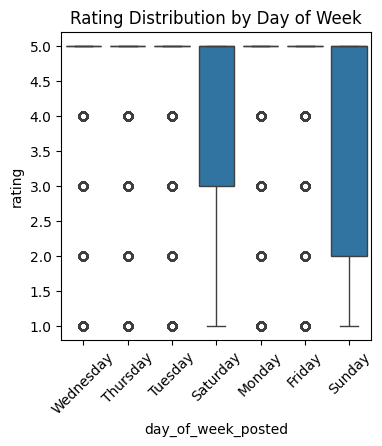

In [149]:
#shows the rating distribution by day of week

plt.figure(figsize=(4, 4))
sns.boxplot(data=df_trustpilot, x='day_of_week_posted', y='rating')
plt.title('Rating Distribution by Day of Week')
plt.xticks(rotation=45)
plt.show()

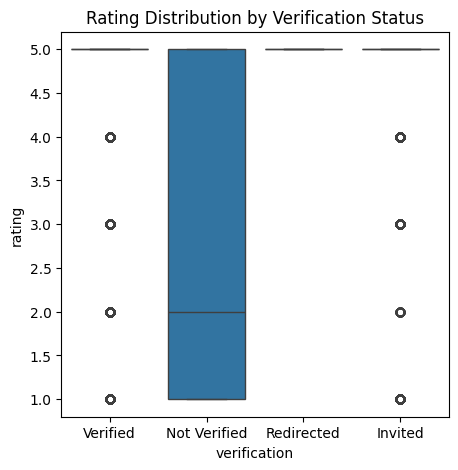

In [150]:
# Rating distribution by verification status

plt.figure(figsize=(5, 5))
sns.boxplot(data=df_trustpilot, x='verification', y='rating')
plt.title('Rating Distribution by Verification Status')
plt.show()

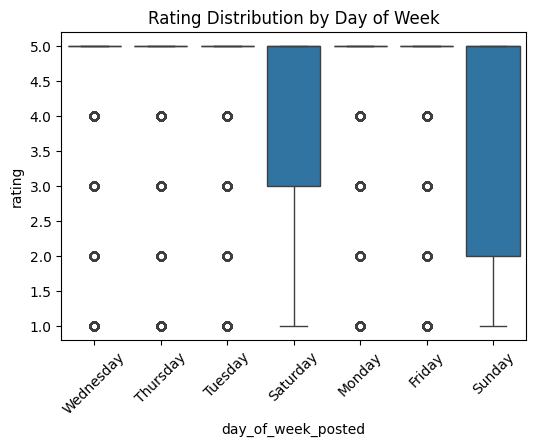

In [151]:
# Rating by day of week
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_trustpilot, x='day_of_week_posted', y='rating')
plt.title('Rating Distribution by Day of Week')
plt.xticks(rotation=45)
plt.show()


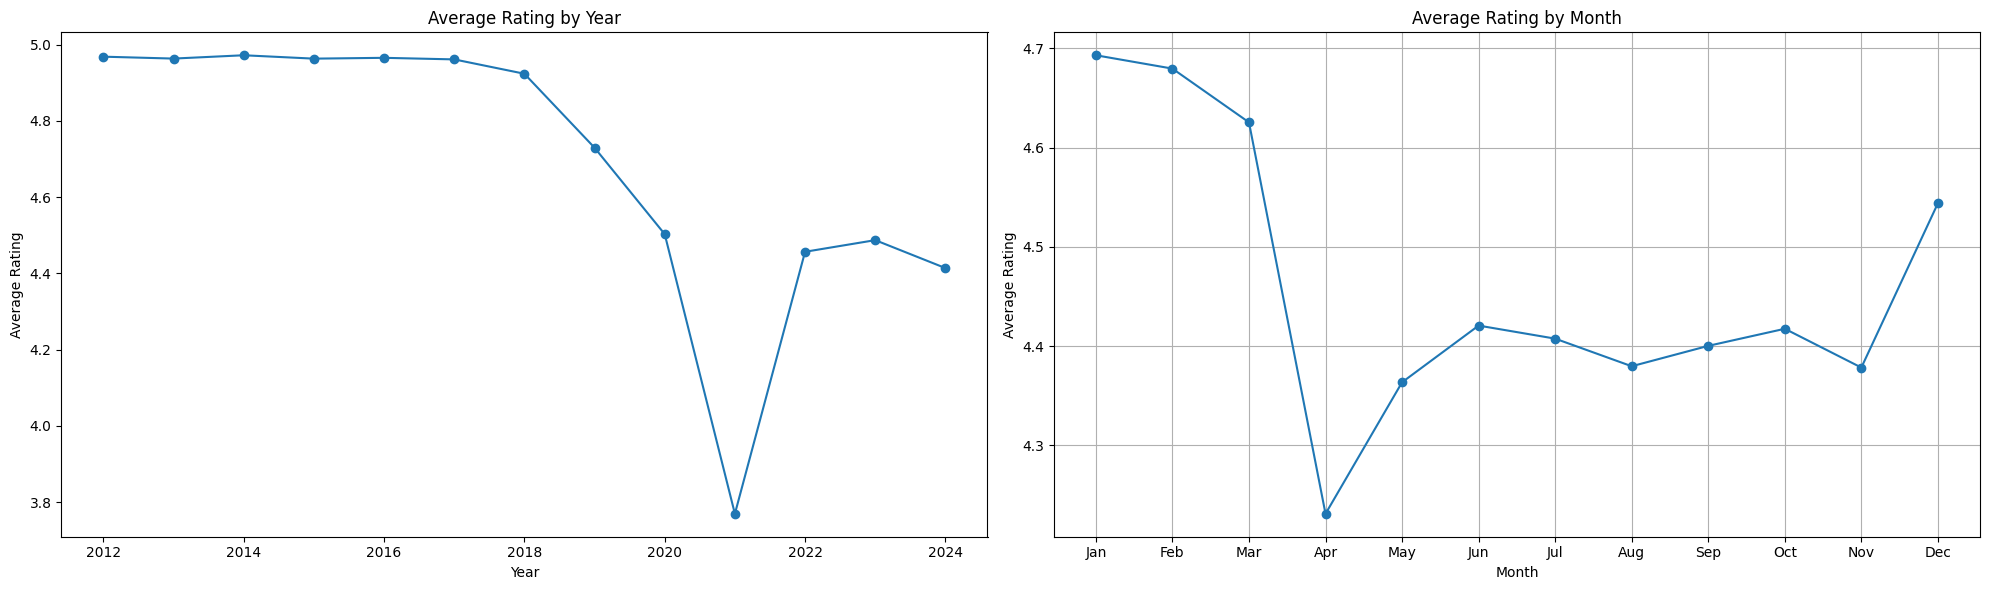


Yearly Average Ratings:
date_posted
2012    4.968811
2013    4.963828
2014    4.972530
2015    4.963663
2016    4.965809
2017    4.961681
2018    4.924012
2019    4.729843
2020    4.503000
2021    3.769118
2022    4.456753
2023    4.487304
2024    4.414013
Name: rating, dtype: float64

Monthly Average Ratings:
date_posted
1     4.693093
2     4.679637
3     4.625512
4     4.231122
5     4.363636
6     4.420738
7     4.407591
8     4.379779
9     4.400311
10    4.417534
11    4.378423
12    4.543961
Name: rating, dtype: float64


In [152]:
# Create figure with two subplots side by side
plt.figure(figsize=(20, 6))

# Yearly average rating
plt.subplot(1, 2, 1)
yearly_avg = df_trustpilot.groupby(df_trustpilot['date_posted'].dt.year)['rating'].mean()
yearly_avg.plot(marker='o')
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')

# Monthly average rating
plt.subplot(1, 2, 2)
monthly_avg = df_trustpilot.groupby(df_trustpilot['date_posted'].dt.month)['rating'].mean()
monthly_avg.plot(marker='o')
plt.title('Average Rating by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.grid(True)

plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()  
plt.show()

print("\nYearly Average Ratings:")
print(yearly_avg)
print("\nMonthly Average Ratings:")
print(monthly_avg)

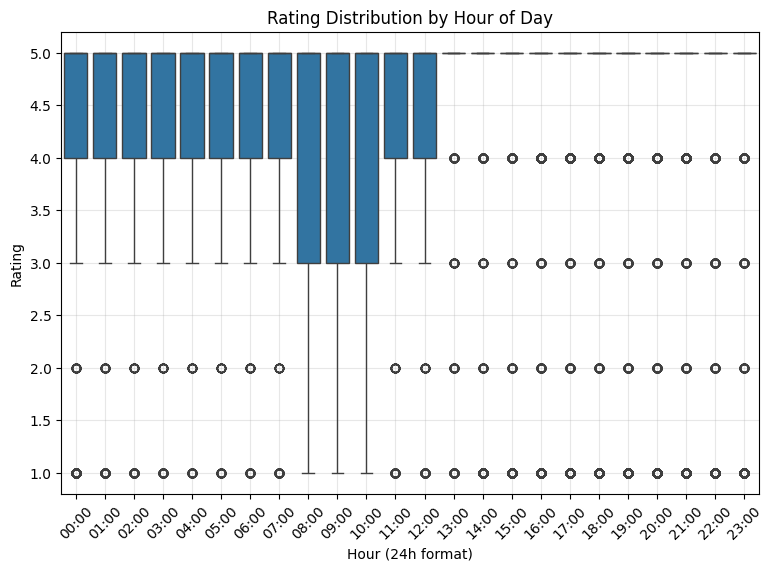

Hourly Statistics:
      mean  count
hour             
0     4.28   1067
1     4.29    865
2     4.25    656
3     4.20    463
4     4.18    396
5     4.31    381
6     4.17    375
7     4.13    444
8     3.96    395
9     3.98    361
10    3.92    363
11    4.16    440
12    4.21    634
13    4.43   1001
14    4.50   1586
15    4.59   2140
16    4.53   2760
17    4.60   3187
18    4.60   3257
19    4.53   2953
20    4.50   2934
21    4.47   2773
22    4.42   2279
23    4.32   1565


In [153]:
# Rating distribution by hour

df_trustpilot['hour'] = df_trustpilot['hour_posted'].astype(str).str[:2].astype(int)
plt.figure(figsize=(9, 6))
sns.boxplot(data=df_trustpilot, x='hour', y='rating')
plt.title('Rating Distribution by Hour of Day')
plt.xlabel('Hour (24h format)')
plt.ylabel('Rating')
plt.xticks(range(24), [f'{i:02d}:00' for i in range(24)], rotation=45)  
plt.grid(True, alpha=0.3)
plt.show()

hourly_stats = df_trustpilot.groupby('hour')['rating'].agg(['mean', 'count']).round(2)
print("Hourly Statistics:")
print(hourly_stats)

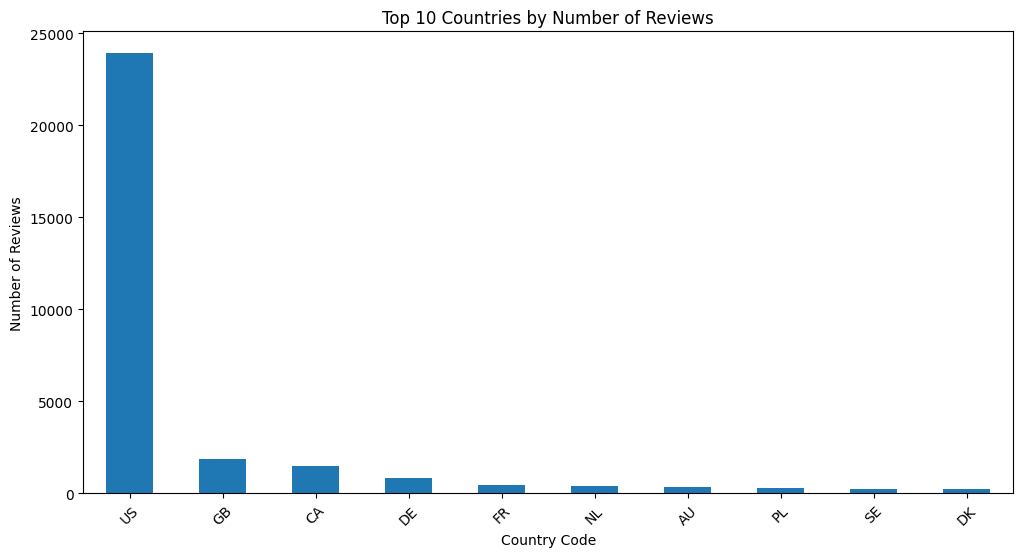

In [154]:
# Location analysis (top 10 countries)

plt.figure(figsize=(12, 6))
df_trustpilot['location'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries by Number of Reviews')
plt.xlabel('Country Code')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

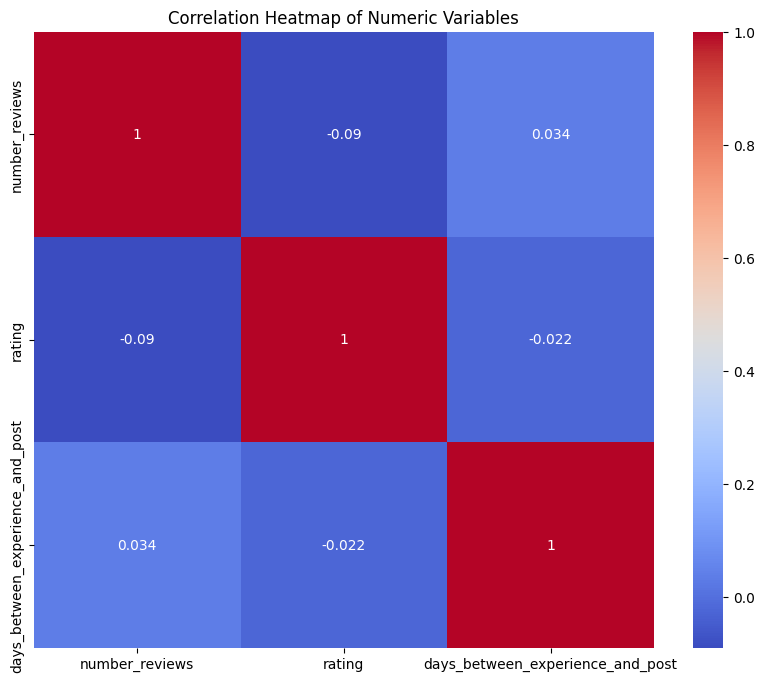

In [155]:
# Correlation heatmap for numeric variables

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_variables.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

<Figure size 800x800 with 0 Axes>

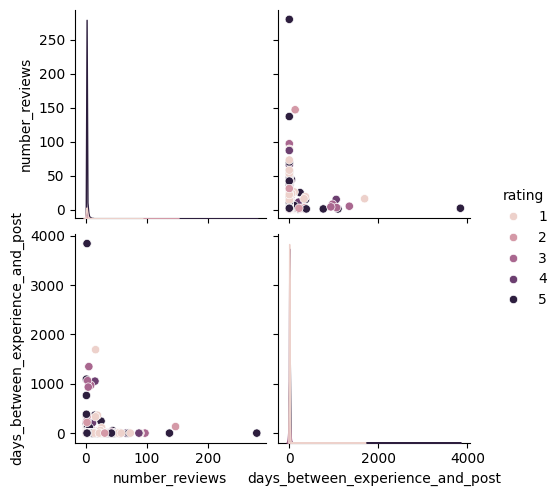

In [156]:
plt.figure(figsize=(8, 8))
sns.pairplot(data=df_trustpilot[['number_reviews', 'location', 'rating', 'text',
       'date_of_experience', 'date_posted', 'verification', 'subject',
       'hour_posted', 'day_of_week_posted',
       'days_between_experience_and_post']], hue='rating', diag_kind='kde')
plt.show()

In [157]:
print(df_trustpilot.columns)

Index(['username', 'number_reviews', 'location', 'rating', 'text',
       'date_of_experience', 'date_posted', 'verification', 'subject',
       'hour_posted', 'day_of_week_posted', 'days_between_experience_and_post',
       'hour'],
      dtype='object')


/var/folders/fj/_k57h65963x0q_bf6vpz8cym0000gn/T/ipykernel_47813/3069507826.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='location', y='rating', data=df_filtered,
/var/folders/fj/_k57h65963x0q_bf6vpz8cym0000gn/T/ipykernel_47813/3069507826.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='location', y='rating', data=df_filtered,


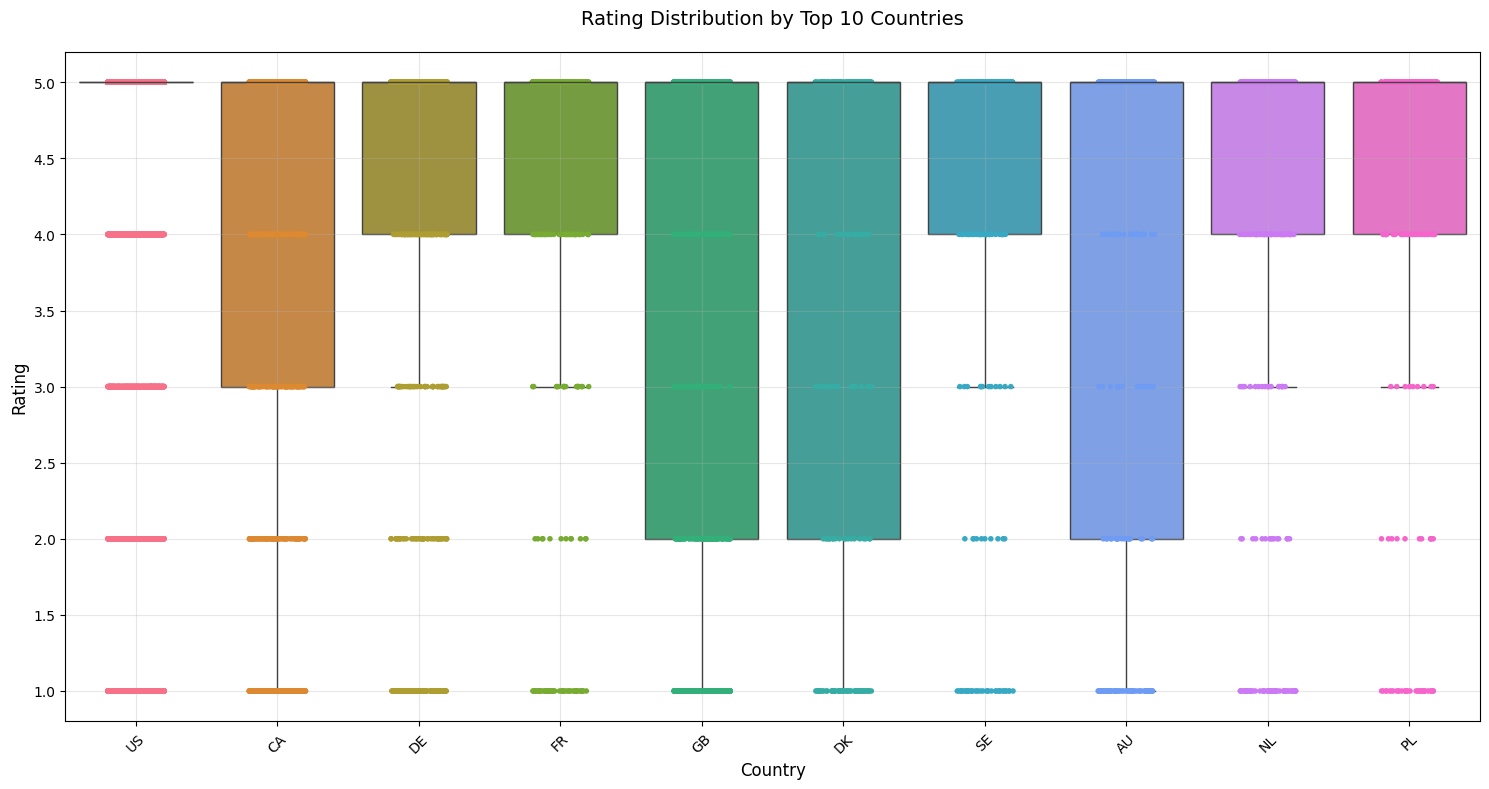

Summary Statistics by Country:
          count  mean  median   std
location                           
AU          324  3.84     5.0  1.66
CA         1490  3.87     5.0  1.57
DE          837  4.12     5.0  1.43
DK          254  3.65     5.0  1.67
FR          449  4.21     5.0  1.40
GB         1854  3.73     5.0  1.72
NL          406  4.12     5.0  1.43
PL          289  4.26     5.0  1.36
SE          260  4.10     5.0  1.46
US        23912  4.64     5.0  1.03


In [158]:
# Get top 10 countries
top_countries = df_trustpilot['location'].value_counts().head(10).index

df_filtered = df_trustpilot[df_trustpilot['location'].isin(top_countries)]
colors = sns.color_palette("husl", n_colors=len(top_countries))

plt.figure(figsize=(15, 8))

# Create boxplot 
sns.boxplot(x='location', y='rating', data=df_filtered,
            palette=colors,
            boxprops={'zorder': 1}, 
            showfliers=False)  

# Add stripplot on top
sns.stripplot(x='location', y='rating', data=df_filtered,
              palette=colors,  
              size=4,  
              jitter=0.2,  
              zorder=2)  


plt.title('Rating Distribution by Top 10 Countries', fontsize=14, pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


print("Summary Statistics by Country:")
print(df_filtered.groupby('location')['rating'].agg(['count', 'mean', 'median', 'std']).round(2))